In [1]:
# Before beginning this notebook you will need to add the following code to the query tool in pgAdmin: 
# ALTER TABLE counties ADD PRIMARY KEY (fips_date); ALTER TABLE hospitals ADD PRIMARY KEY (fips_date);
# Additionally, you will need to enter your password into the connection_string variable in the config.py file. 
# The place holder text is YOURPASSWORDHERE

In [1]:
# Import dependencies
import sqlalchemy
from sqlalchemy import create_engine
from config import connection_string
import pandas as pd
import psycopg2 as pg

In [2]:
 # Create engine using the database file
engine = sqlalchemy.create_engine(connection_string)

In [3]:
dbConnection = engine.connect();

In [4]:
merged_df = pd.read_sql("SELECT * FROM counties INNER JOIN hospitals ON counties.fips_date = hospitals.fips_date", dbConnection);

In [53]:
merged_df

,index,fips,collection_week,cases_to_date,deaths_to_date,fips_date,index,fips_code,collection_week,total_beds_7_day_sum,...,total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum,total_ped_patients_hospitalized_con_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_con_and_sus_covid_7_day_sum,staffed_icu_adult_patients_con_covid_7_day_sum,fips_date
0,4,1001.0,2020-08-28,9484,161,1001.02020-08-28,4,1001.0,2020-08-28,574,...,0,0,455,42,42,40,40,18,18,1001.02020-08-28
1,10,1001.0,2020-10-09,12913,191,1001.02020-10-09,10,1001.0,2020-10-09,574,...,0,0,455,42,42,40,40,17,17,1001.02020-10-09
2,11,1001.0,2020-10-16,13481,196,1001.02020-10-16,11,1001.0,2020-10-16,578,...,0,0,459,42,42,31,31,14,14,1001.02020-10-16
3,16,1001.0,2020-11-20,17541,260,1001.02020-11-20,16,1001.0,2020-11-20,581,...,0,0,462,42,42,39,39,14,14,1001.02020-11-20
4,27,1001.0,2021-02-05,40059,498,1001.02021-02-05,27,1001.0,2021-02-05,602,...,0,0,462,42,42,42,42,33,33,1001.02021-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159059,208900,78020.0,2021-07-02,1759,7,78020.02021-07-02,159854,78020.0,2021-07-02,924,...,0,0,784,56,56,34,34,10,10,78020.02021-07-02
159060,208902,78020.0,2021-07-16,1772,7,78020.02021-07-16,159856,78020.0,2021-07-16,924,...,0,0,784,56,56,35,35,14,14,78020.02021-07-16
159061,208904,78020.0,2021-07-30,1831,7,78020.02021-07-30,159858,78020.0,2021-07-30,924,...,0,0,784,56,56,37,37,13,13,78020.02021-07-30
159062,208913,78020.0,2021-10-01,2293,21,78020.02021-10-01,159867,78020.0,2021-10-01,924,...,0,0,784,56,56,43,43,7,7,78020.02021-10-01


# Linear Regression

Linear regression model to predict number of icu beds needs for COVID patient for facilities. 

In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

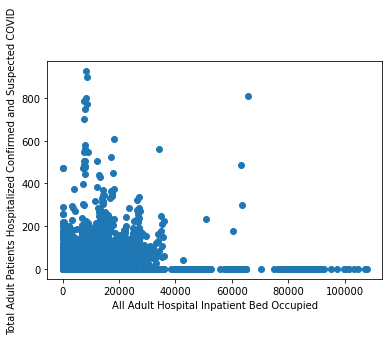

In [7]:
# Build scatter plot 
plt.scatter(merged_df.all_adult_hospital_inpatient_bed_occupied_7_day_sum, merged_df.total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum)
plt.xlabel('All Adult Hospital Inpatient Bed Occupied')
plt.ylabel('Total Adult Patients Hospitalized Confirmed and Suspected COVID')

plt.show()

In [8]:
X = merged_df.all_adult_hospital_inpatient_bed_occupied_7_day_sum.values.reshape(-1, 1)

In [9]:
X[:5]

array([[346],
       [349],
       [321],
       [333],
       [430]], dtype=int64)

In [10]:
X.shape

(159064, 1)

In [11]:
y = merged_df.total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum

In [12]:
model = LinearRegression()

In [133]:
model.fit(X, y)

LinearRegression()

In [136]:
y_pred = model.predict(X)
print(y_pred)

[192.50733029 253.24282442 267.83508461 ...  68.51760454  86.07829679
  86.49220165]


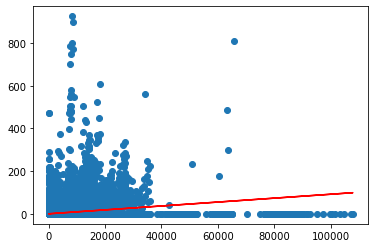

In [15]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [16]:
print(model.coef_)
print(model.intercept_)

[0.00091506]
0.5278289244721284


# Linear Regression 

Using linear regression model to predict deaths through cases and adult patients convicted covid in a week. 

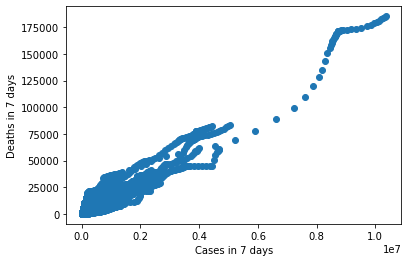

In [106]:
# Build scatter plot to inspect the relationship
plt.scatter(merged_df.cases_to_date	, merged_df.deaths_to_date)
plt.xlabel('Cases in 7 days')
plt.ylabel('Deaths in 7 days')
plt.show()

In [107]:
X = merged_df.total_icu_beds_7_day_sum.values.reshape(-1, 1)

In [108]:
X[:5]

array([[42],
       [42],
       [42],
       [42],
       [42]], dtype=int64)

In [109]:
X.shape

(159064, 1)

In [110]:
y = merged_df.icu_beds_used_7_day_sum

In [111]:
model = LinearRegression()

In [112]:
model.fit(X, y)

LinearRegression()

In [113]:
y_pred = model.predict(X)
print(y_pred)

[40.75523473 40.75523473 40.75523473 ... 49.67472683 49.67472683
 49.67472683]


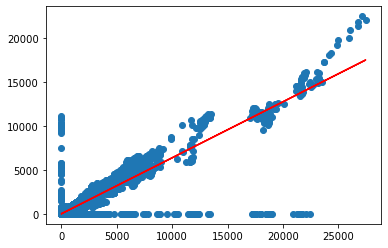

In [114]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [115]:
print(model.coef_)
print(model.intercept_)

[0.63710658]
13.996758434995513


In [119]:
X = merged_df[['cases_to_date', 'staffed_icu_adult_patients_con_covid_7_day_sum']]
Y = merged_df['deaths_to_date']
X.head()

,cases_to_date,staffed_icu_adult_patients_con_covid_7_day_sum
0,9484,18
1,12913,17
2,13481,14
3,17541,14
4,40059,33


In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
x_train

,cases_to_date,staffed_icu_adult_patients_con_covid_7_day_sum
109063,30694,0
59884,50008,19
133790,6564,0
122081,228282,26
120792,3941,0
...,...,...
68044,167172,563
31698,81922,72
94071,105238,112
78550,11488,0


In [122]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [123]:
clf.fit(x_train,y_train)

LinearRegression()

In [124]:
clf.predict(x_test)

array([ 245.61216744, 6158.87977996,  245.4406366 , ..., 1233.41826598,
        105.22008195,  390.57203381])

In [125]:
clf.score(x_test,y_test)

0.9034636711880965